In [1]:
from pytesis.intervals import *
from pytesis.datasets import arc, eyeglasses, filled_circle, add_noise, add_outliers
from pytesis.datasets import ggplot_dataset
from pytesis.utils import plot_dataset, plot_result
from pytesis.fermat import fermat_dist
from sklearn.metrics import pairwise_distances
from functools import partial
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# import logging
# logging.basicConfig(level=logging.INFO)

In [2]:
def run_all(X, h=0.3):
    B = 300
    print("Starting run...")
    result_euclid = hausd_interval(X, B=B)
    print("Finished running euclidean")
    result_kde = bootstrap_function_interval(X, B=B, value_function=partial(kde_value_f, h=h), grid_n=100)
    print("Finished running KDE")
    fermat_matrix = fermat_dist(X, alpha=2)
    print("Computed fermat distance matrix")
    result_fermat = hausd_interval(fermat_matrix, B=B, pairwise_dist=True)
    print("Finished running Fermat")

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    plot_dataset(X, ax=axs[0, 0])
    plot_result(result_euclid, ax=axs[0, 1], title="Euclideo")
    plot_result(result_fermat, ax=axs[1, 0], title="Fermat")
    plot_result(result_kde, ax=axs[1, 1], title="Densidad")
    fig.show()

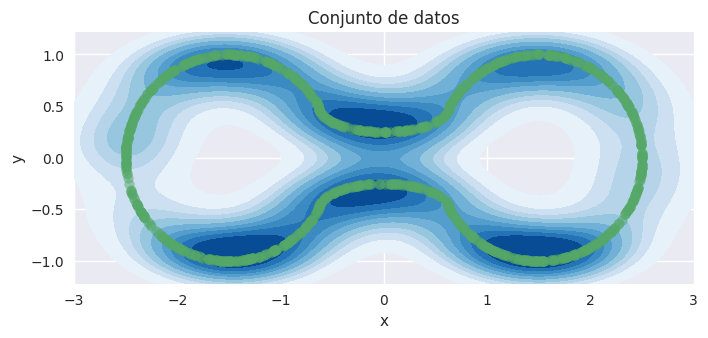

In [10]:
X = eyeglasses(n=1000, bridge_height=0.5, r=1, separation=3)
# X = arc(n=20000, max_abs_angle=np.pi/2, angle_shift=0)

plt.figure()
plot_dataset(X).set_aspect("equal")
plt.show()


Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


/var/folders/ff/pg_ltqz14c122_7t1fcfhs0c0000gn/T/ipykernel_82518/1755337732.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


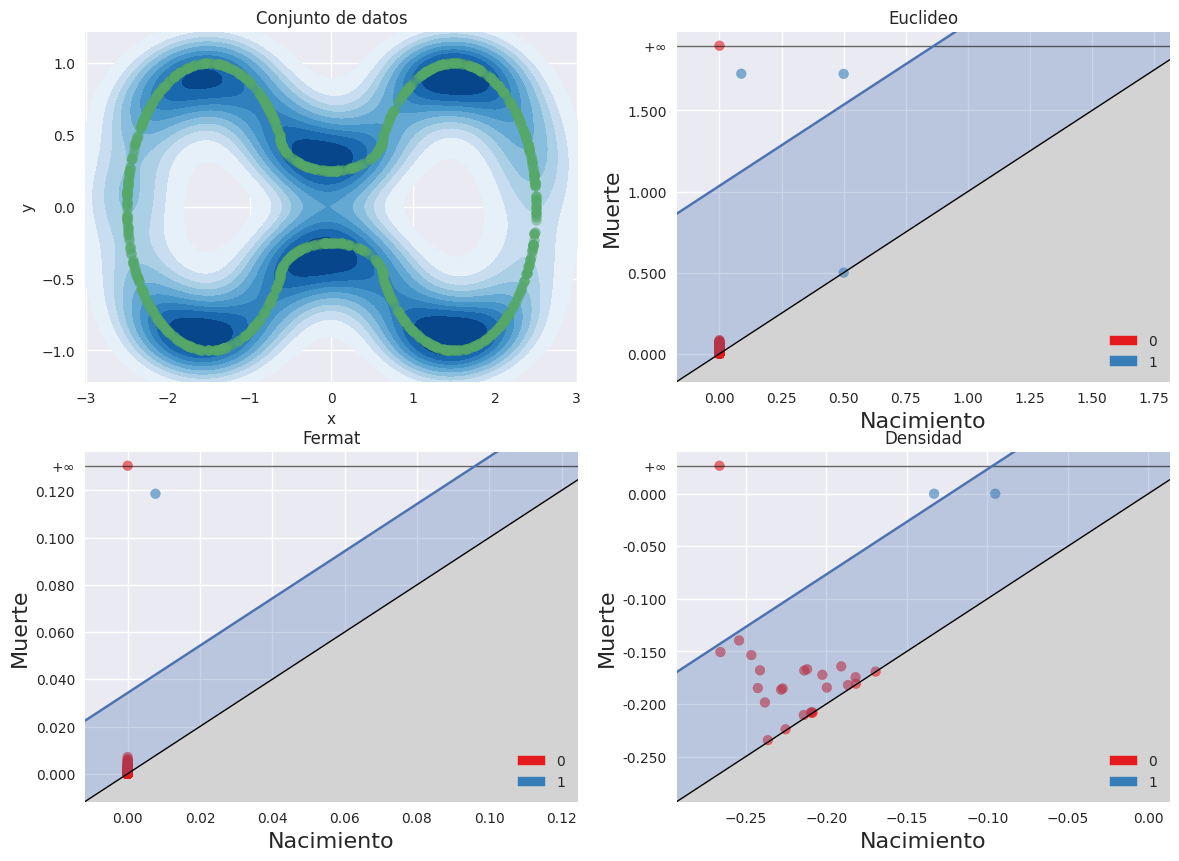

In [12]:
# n = 1000
run_all(eyeglasses(n=1000, bridge_height=0.5, r=1, separation=3), h=0.15)

Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


/var/folders/ff/pg_ltqz14c122_7t1fcfhs0c0000gn/T/ipykernel_82518/1755337732.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


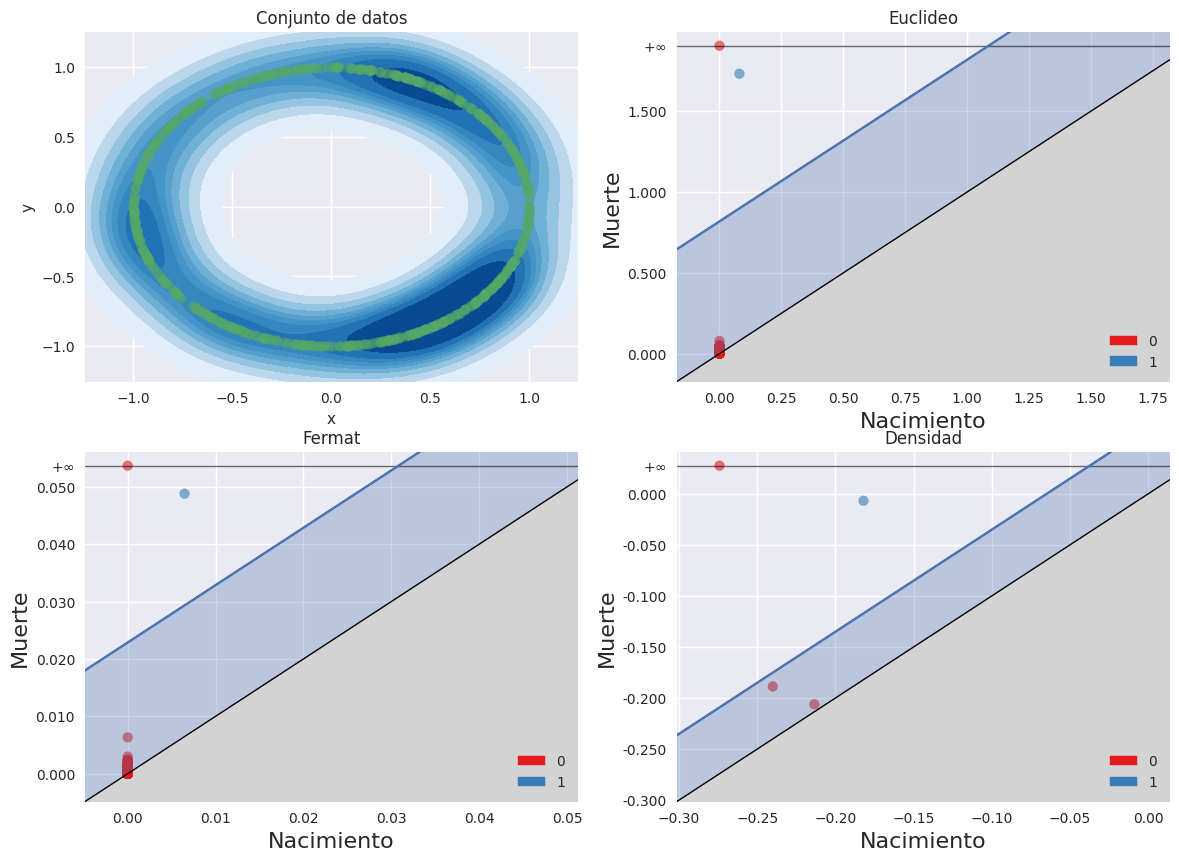

In [7]:
n = 500
run_all(arc(n=n))

Starting run...
Finished running euclidean
Finished running KDE
Computed fermat distance matrix
Finished running Fermat


/var/folders/ff/pg_ltqz14c122_7t1fcfhs0c0000gn/T/ipykernel_82518/1755337732.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


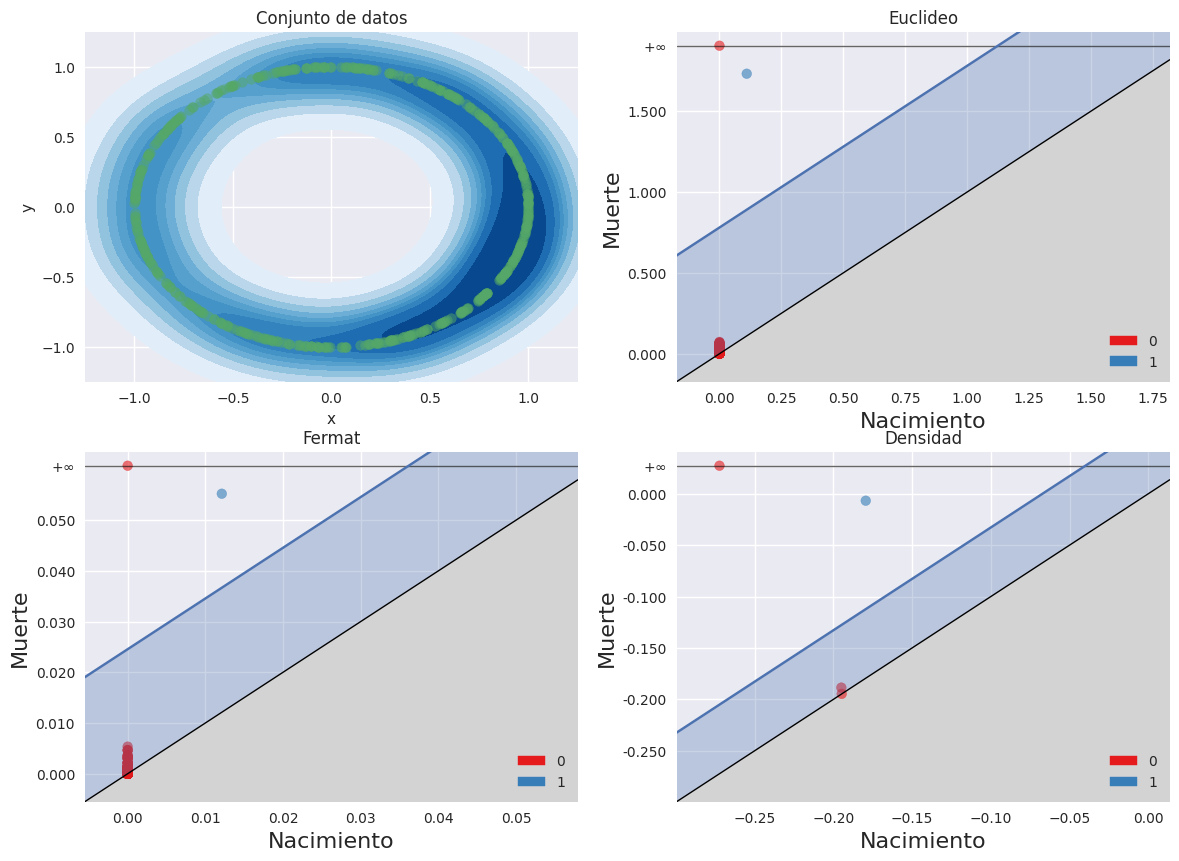

In [8]:
n = 500
run_all(arc(n=n, sampling="normal"))

In [ ]:
n = 1500
run_all(filled_circle(n=n, r_power=3))

Starting run...
